In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<h3> Data Exploration

In [4]:
# The types of each attribute in the dataset
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [5]:
# Dimensions of the dataset
loans.shape

(9578, 14)

In [6]:
# Mean of all attributes
loans.mean()

credit.policy            0.804970
int.rate                 0.122640
installment            319.089413
log.annual.inc          10.932117
dti                     12.606679
fico                   710.846314
days.with.cr.line     4560.767197
revol.bal            16913.963876
revol.util              46.799236
inq.last.6mths           1.577469
delinq.2yrs              0.163708
pub.rec                  0.062122
not.fully.paid           0.160054
dtype: float64

In [7]:
# Median of all attributes
loans.median()

credit.policy           1.000000
int.rate                0.122100
installment           268.950000
log.annual.inc         10.928884
dti                    12.665000
fico                  707.000000
days.with.cr.line    4139.958333
revol.bal            8596.000000
revol.util             46.300000
inq.last.6mths          1.000000
delinq.2yrs             0.000000
pub.rec                 0.000000
not.fully.paid          0.000000
dtype: float64

In [8]:
# Mode of all attributes
loans.mode()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1253,317.72,11.0021,0.0,687,3660.0,0,0.0,0,0,0,0


<h4>The ratio between loans paid back fully or not.

Positive examples = 1533
Negative examples = 8045
Proportion of positive to negative examples = 19.06%


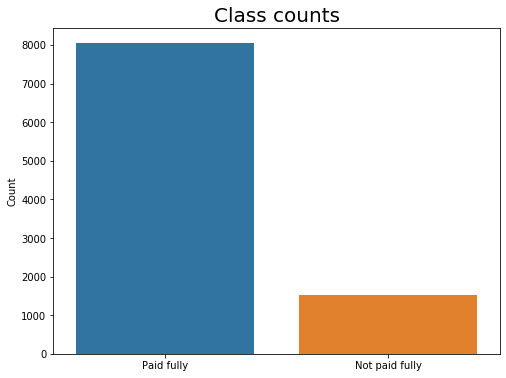

In [9]:
# Get number of positve and negative examples
pos = loans[loans["not.fully.paid"] == 1].shape[0]
neg = loans[loans["not.fully.paid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(loans["not.fully.paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

<h4>Relationship between the FICO score of the borrower and the Credit Policy (0 or 1) using a Histogram.

Text(0.5, 0, 'FICO')

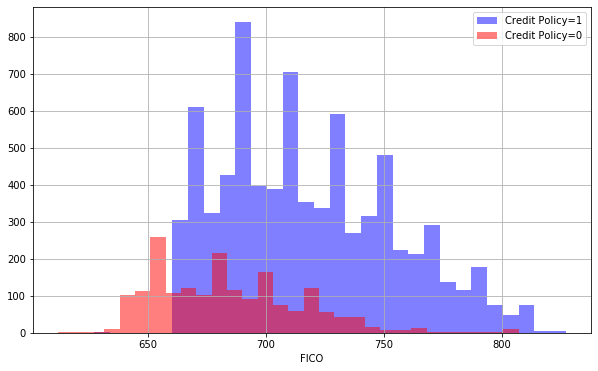

In [10]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit Policy=0')
plt.legend()
plt.xlabel('FICO')

#Observations
#When credit policy is 1 , the fico score is higher.

<h4>Countplot to check the relationship between the purpose of the loan and the repayment

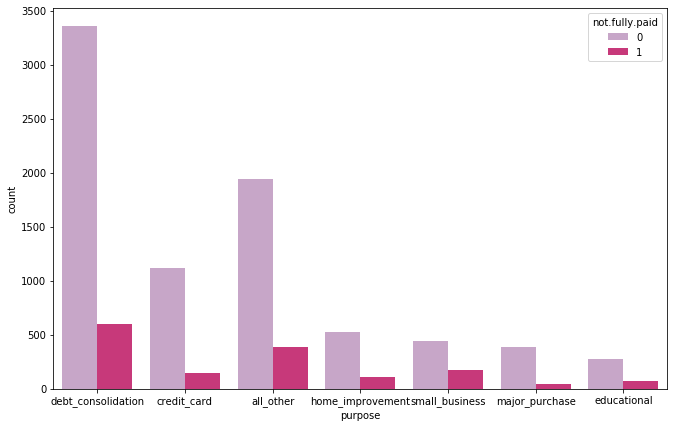

In [11]:
plt.figure(figsize=(11,7))
sns.countplot('purpose',hue='not.fully.paid',data=loans,palette='PuRd')

#Observations
#The Repayment of loans is independent of the purpose , because the ratio is same for almost every purpose.

<h4>Relationship between Interest rate and the FICO Score using a Scatterplot

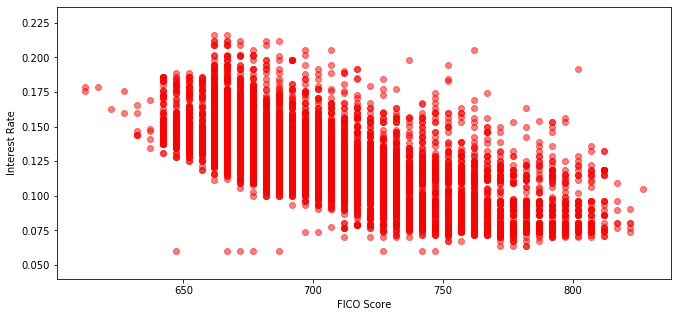

In [12]:

fico = loans['fico']
int_rate = loans['int.rate']
plt.figure(figsize=(11,5))

plt.scatter(fico, int_rate, c='r', alpha=0.5)
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.show()

#Observations
#The higher the FICO Score , lesser is the interest rate.
#Good FICO score gives the lender a sense of trust on the borrower.